In [21]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import arviz as az
import pytensor as pt

import pandas as pd



# a)Incarcam setul de date într-un dataframe pandas
df = pd.read_csv('/content/drive/MyDrive/BostonHousing.csv')
print(df.head())


# b) Definiti modelul PyMC folosind variabilele independente rm, crim si indus pentru a prezice variabila dependenta medv
with pm.Model() as model:
    # Definirea parametrilor
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta_rm = pm.Normal('beta_rm', mu=0, sigma=10)
    beta_crim = pm.Normal('beta_crim', mu=0, sigma=10)
    beta_indus = pm.Normal('beta_indus', mu=0, sigma=10)
    # Definirea modelului liniar
    mu = intercept + beta_rm * df['rm'] + beta_crim * df['crim'] + beta_indus * df['indus']
    # Definirea distributiei pentru variabila dependenta medv
    medv = pm.Normal('medv', mu=mu, sigma=1, observed=df['medv'])

    # Estimarea parametrilor folosind MCMC
    trace = pm.sample(2000, tune=1000)





      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


c) Din acest rezumat, putem observa care dintre variabilele independente (rm, crim si indus) au intervalele de incredere cele mai stranse, ceea ce ar putea indica o influenta mai puternica asupra variabilei dependente (medv).

In [14]:
#Estimari de 95% pentru HDI
summary = az.summary(trace, hdi_prob=0.95)
print(summary)


              mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
intercept  -22.102  0.469   -23.025    -21.217      0.012    0.009    1511.0   
beta_rm      7.643  0.069     7.512      7.776      0.002    0.001    1566.0   
beta_crim   -0.200  0.006    -0.211     -0.190      0.000    0.000    2178.0   
beta_indus  -0.240  0.007    -0.253     -0.224      0.000    0.000    2057.0   

            ess_tail  r_hat  
intercept     1839.0    1.0  
beta_rm       1983.0    1.0  
beta_crim     2401.0    1.0  
beta_indus    2288.0    1.0  


In [40]:

#d)#extrageri din distributia predictiva
with model:
    post_pred = pm.sample_posterior_predictive(trace)

#50% HDI pentru valoarea locuintelor
az.plot_forest(post_pred,hdi_prob=0.50,var_names=['medv_obs'])
az.summary(post_pred,hdi_prob=0.50,var_names=['medv_obs'])


TypeError: sample_posterior_predictive() got an unexpected keyword argument 'samples'

**Subiectul 2**


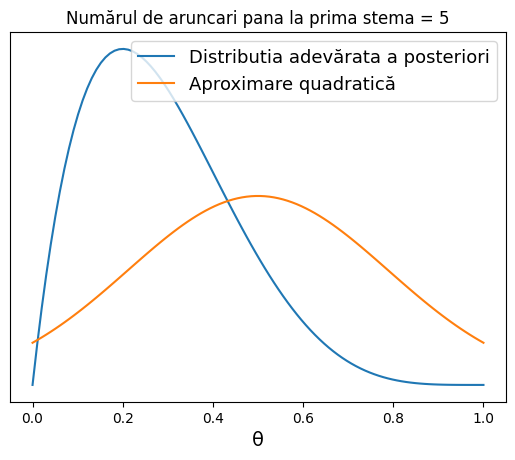

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def posterior_grid(grid_points=50, first_heads_at=5):
    """
    A grid implementation for modeling the first appearance of a head
    """
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1/grid_points, grid_points) # uniform prior

    likelihood = stats.geom.pmf(first_heads_at, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    return grid, posterior


points = 50
first_heads_at = 5
grid, posterior = posterior_grid(points, first_heads_at)


plt.plot(grid, posterior, 'o-')
plt.title(f'Probabilitatea de a obține stema la prima aruncare (aparția la a {first_heads_at}-a aruncare)')
plt.xlabel('Probabilitatea de a obține stema la o aruncare')
plt.ylabel('Probabilitatea a posteriori')
plt.show()

max_prob_theta = grid[np.argmax(posterior)]
print(f"Probabilitatea maximă a posteriori: {np.max(posterior)} pentru θ = {max_prob_theta}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')